# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [2]:
#write code here
data = pd.read_csv('data1.csv')
df = data.copy()

#### **Task 2: Display first five rows** 

In [3]:
#write code here
df.head(5)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 3: Drop 'unnamed: 0' column**

In [4]:
#write code here
df.to_csv('data1.csv',index=False)

In [5]:
df.columns.str.match("Unnamed")


array([ True, False, False, False, False, False, False, False, False,
       False])

In [6]:
df.loc[:,~df.columns.str.match("Unnamed")]

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
...,...,...,...,...,...,...,...,...,...
215904,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.30,Turista,Promo
215905,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.30,Turista,Promo
215906,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.30,Turista,Promo
215907,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.30,Turista,Promo


In [7]:
df.drop("Unnamed: 0",axis=1)

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
...,...,...,...,...,...,...,...,...,...
215904,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.30,Turista,Promo
215905,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.30,Turista,Promo
215906,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.30,Turista,Promo
215907,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.30,Turista,Promo


In [8]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 4: Check the number of rows and columns**

In [9]:
#write code here
df.shape

(215909, 9)

#### **Task 5: Check data types of all columns**

In [10]:
#write code here
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

#### **Task 6: Check summary statistics**

In [11]:
#write code here
df.describe(include = 'all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


#### **Task 7: Check summary statistics of all columns, including object dataypes**

In [12]:
df.describe(include=["O"])

,insert_date,origin,destination,start_date,end_date,train_type,train_class,fare
count,215909,215909,215909,215909,215909,215909,215266,215266
unique,30543,5,5,2231,2870,16,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,Turista,Promo
freq,90,110440,105469,2089,1278,126577,164016,132065


In [13]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Question: Explain the summary statistics for the above data set**

**Answer:** By using the describe function we have got the mean, median and mode. We need to check the skewness of the given data. 

#### **Task 8: Check null values in dataset**

In [14]:
#write code here
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Task 9: Fill the Null values in the 'price' column.**<br>
*Hint: Take mean*

In [15]:
df['price'].isnull().values.any()

True

In [16]:
#write code here
df['price'].isnull().sum()

13588

#### **Task 10: Drop the rows containing Null values in the attributes train_class and fare**

In [17]:
#write code here
df.dropna(subset=['train_class','fare'], inplace = True)

#### **Task 11: Drop 'insert_date'**

In [18]:
#write code here
df.drop(["insert_date"], axis=1, inplace=True)

**Check null values again in dataset**

In [19]:
#write code here
df.isnull().sum()

origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          12945
train_class        0
fare               0
dtype: int64

#### **Task 12: Plot number of people boarding from different stations**


<AxesSubplot:xlabel='origin', ylabel='count'>

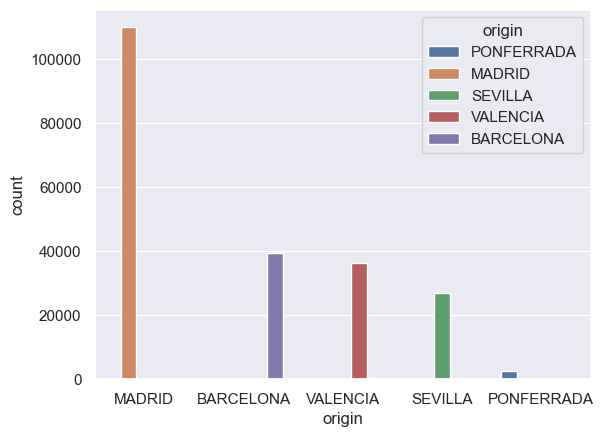

In [20]:
#write code here
sns.countplot(x='origin', hue='origin', data=df, order = df['origin'].value_counts().index)

**Question: What insights do you get from the above plot?**

**Answer:** From the above plot we can observe that most of the people boarded from Madrid (more than 100000) as compared to remaining cities i.e. Barcelona, Valencia, Sevilla and finally Ponderrada. We can analyze that minimum people boarded from Ponferrada.

#### **Task 13: Plot number of people for the destination stations**


<AxesSubplot:xlabel='destination', ylabel='count'>

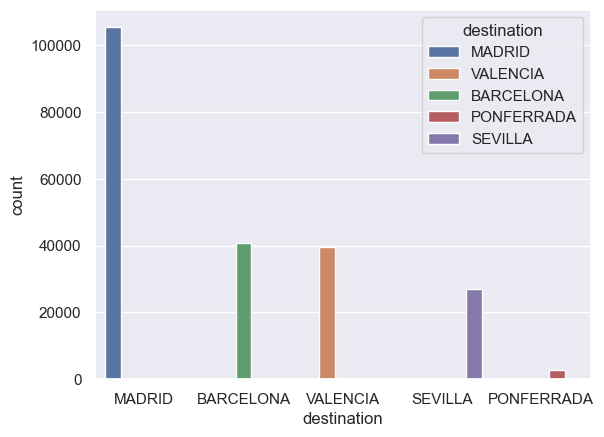

In [21]:
#write code here
sns.countplot(x='destination', hue='destination', data=df, order = df['destination'].value_counts().index)

**Question: What insights do you get from the above graph?**

**Answer:** Now from this destiantion plot we can analyze that most of people are going to Madrid as compared to other cities. In the above graph least people are interested in going to Ponferrada.

#### **Task 14: Plot different types of train that runs in Spain**


<AxesSubplot:xlabel='count', ylabel='train_type'>

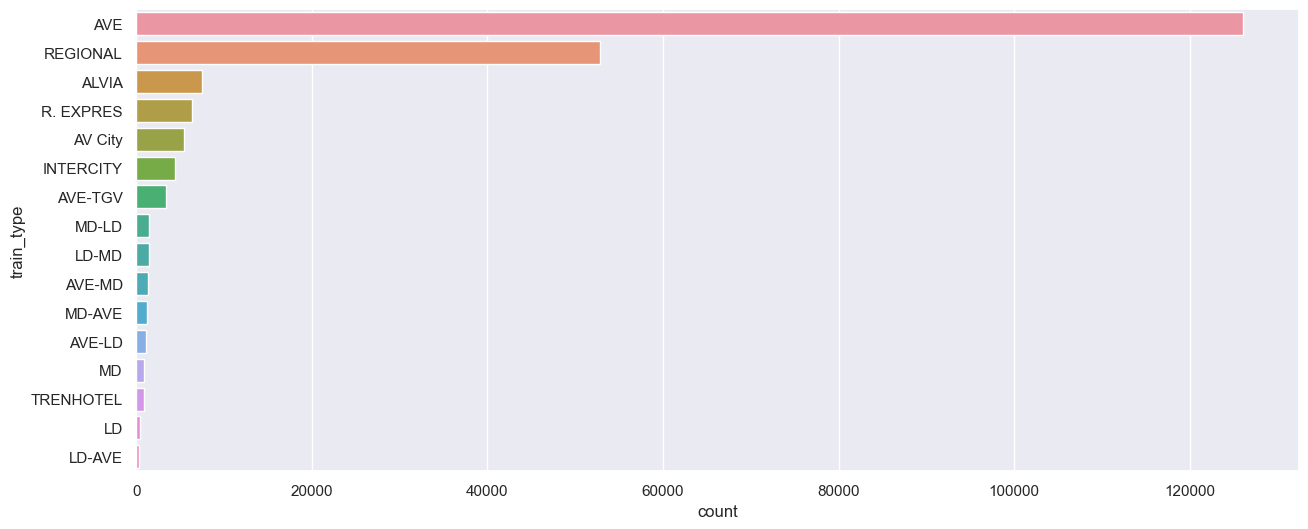

In [22]:
#write code here
plt.figure(figsize=(15,6));
sns.countplot(y='train_type', data=df, order = df['train_type'].value_counts().index)

**Question: Which train runs the maximum in number as compared to other train types?**

**Answer:** AVE train runs the maximum as compared to other train. Second best result is for REGIONAL


#### **Task 15: Plot number of trains of different class**


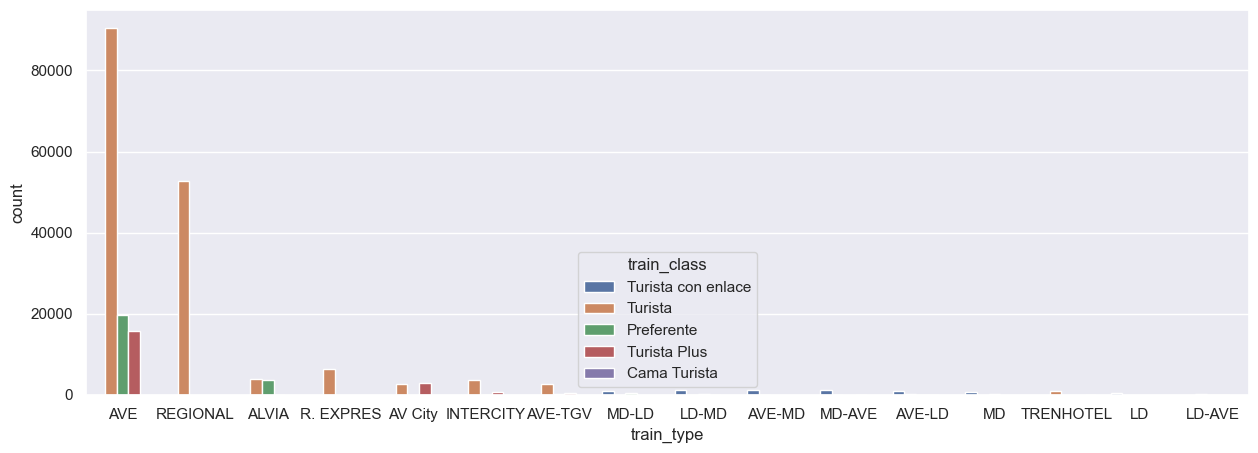

In [23]:
#write code here
plt.subplots(figsize=(15,5))
ax= sns.countplot(x='train_type', hue='train_class', data=df, order=df['train_type'].value_counts().index)

**Question: Which the most common train class for traveling among people in general?**

**Answer:** Turista is the most common train class for traveling


#### **Task 16: Plot number of tickets bought from each category**


Number of tickets bought from Promo category are      :  132065
Number of tickets bought from Adulto ida category are :  59222
Number of tickets bought from Flexible category are   :  20810
Number of tickets bought from Promo + category are    :  3081
Number of tickets bought from Mesa category are       :  88


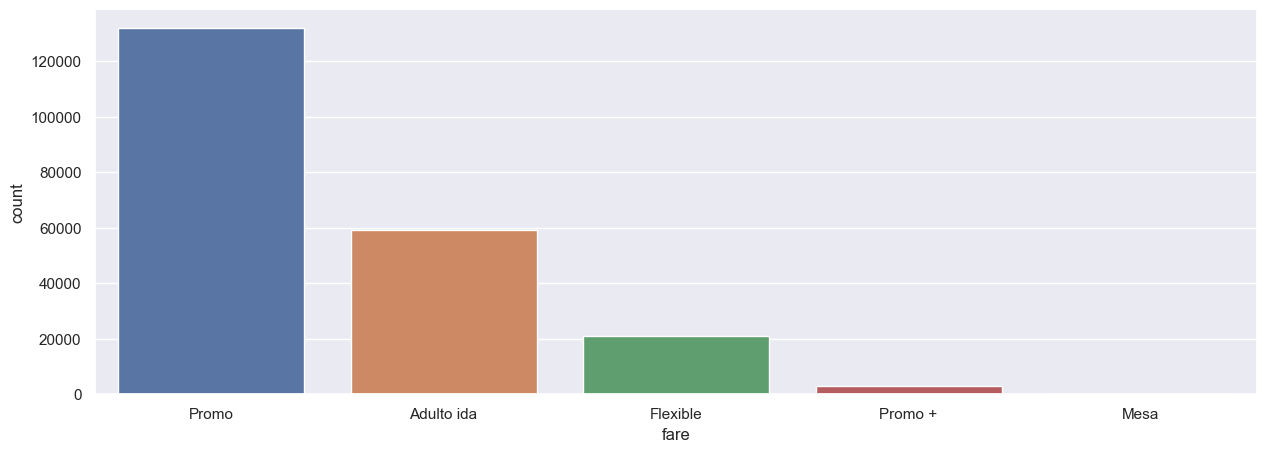

In [24]:
#write code here
plt.subplots(figsize=(15,5))
sns.countplot(x='fare', data= df, order=df['fare'].value_counts().index)
print("Number of tickets bought from Promo category are      : ", (df['fare'].values== 'Promo').sum())
print("Number of tickets bought from Adulto ida category are : ", (df['fare'].values== 'Adulto ida').sum())
print("Number of tickets bought from Flexible category are   : ", (df['fare'].values== 'Flexible').sum())
print("Number of tickets bought from Promo + category are    : ", (df['fare'].values== 'Promo +').sum())
print("Number of tickets bought from Mesa category are       : ", (df['fare'].values== 'Mesa').sum())

**Question: Which the most common tickets are bought?**

**Answer:** Promo si the most common ticket that is bough

#### **Task 17: Plot distribution of the ticket prices**

C:\Users\G309\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

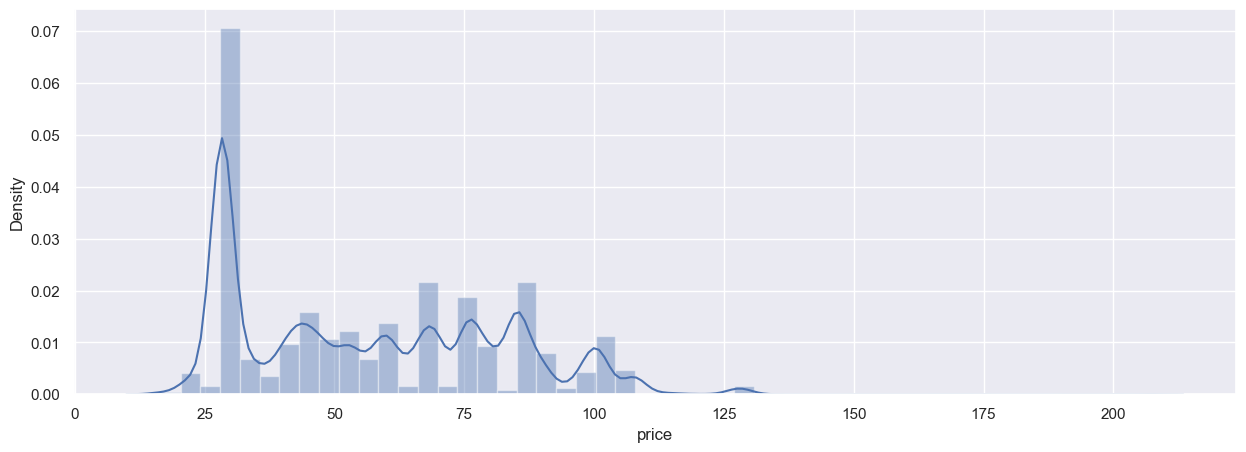

In [25]:
#write code here
plt.subplots(figsize=(15,5))
sns.distplot(df['price'])

**Question: What readings can you get from the above plot?**

**Answer:**      highest ticket bought between the range of 25-30    

###### **Task 18: Show train_class vs price through boxplot**

<AxesSubplot:xlabel='train_class', ylabel='price'>

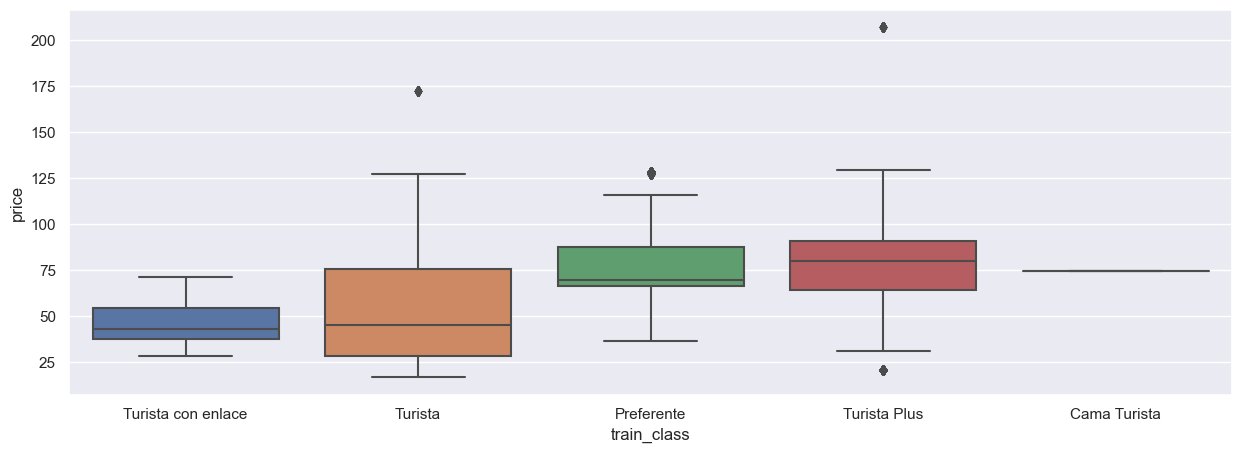

In [26]:
#write code here
plt.subplots(figsize=(15,5))
sns.boxplot(x='train_class', y='price', data=df)

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:** Turista con enlance has the minimum price as compared to others

#### **Task 19: Show train_type vs price through boxplot**


<AxesSubplot:xlabel='train_type', ylabel='price'>

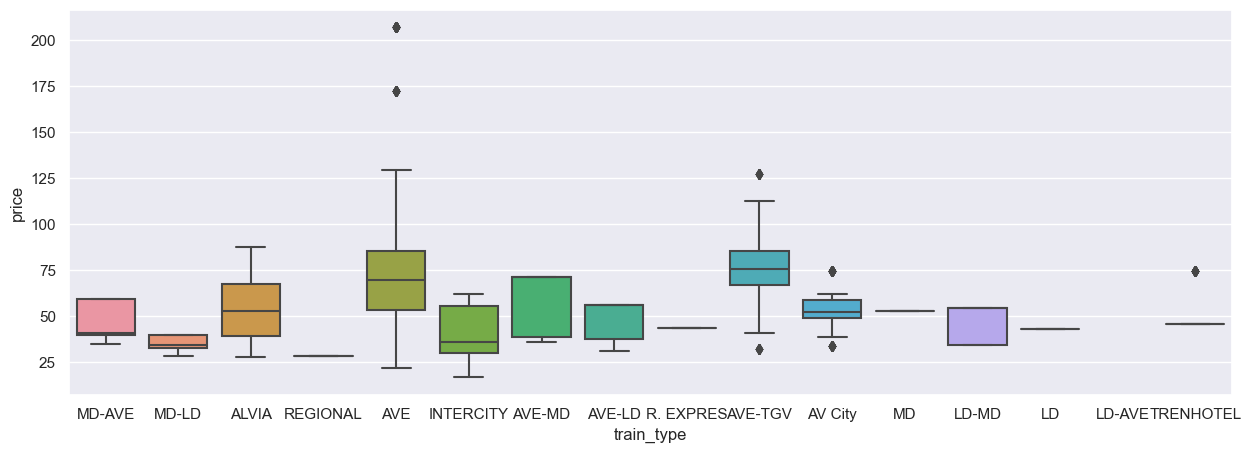

In [27]:
#write code here
plt.subplots(figsize=(15,5))
sns.boxplot(x='train_type', y='price', data=df)

**Question: Which type of trains cost more as compared to others?**

**Answer:** 

AVE fare are the maximum as compared to other plots

## Feature Engineering


In [28]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [29]:
#write code here
import datetime


In [30]:
df.head()

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [31]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [32]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

#### **Task 20: Remove redundant features**


**You need to remove features that are giving the related values as  'travel_time_in_hrs'**<br>
*Hint: Look for date related columns*

In [33]:
#write code here
df.drop(['start_date', 'end_date'], axis=1, inplace=True)
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333


We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Task 21: Findout people travelling from MADRID to SEVILLA

In [34]:
#write code here
df1 = df.copy()

In [35]:
df1['MadridtoSevilla'] = None
df1.loc[(df1['origin'] == 'MADRID') & (df1['destination'] == 'SEVILLA'), 'MadridtoSevilla'] = 1
print('People travelling from MADRID to SEVILLA are : ', df1['MadridtoSevilla'].sum())

People travelling from MADRID to SEVILLA are :  26961


#### Task 22: Make a plot for finding out travelling hours for each train type

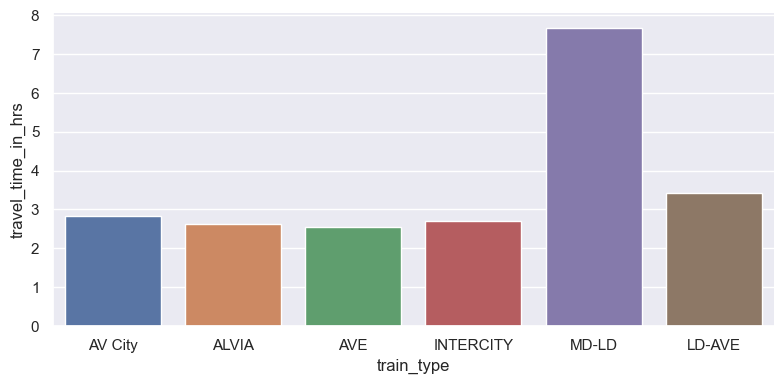

In [36]:
#write code here
df1.dropna(subset=['MadridtoSevilla'], inplace = True)
ax= sns.catplot(kind='bar',x='train_type', y='travel_time_in_hrs', data=df1, height=4, aspect=2);

#### **Task 23: Show train_type vs price through boxplot**


<AxesSubplot:xlabel='train_type', ylabel='price'>

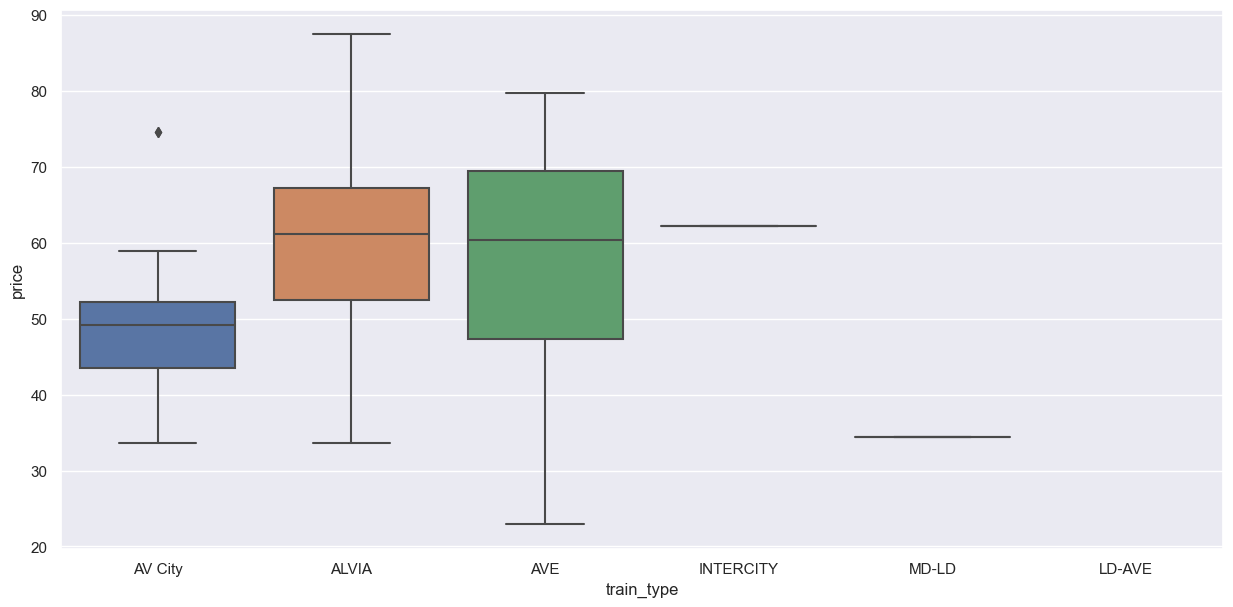

In [37]:
#write code here
plt.subplots(figsize=(15,7))
sns.boxplot(x='train_type', y='price', data=df1)

## **Travelling from MADRID to BARCELONA**


#### Task 24: Findout people travelling from MADRID to BARCELONA

In [38]:
#write code here
df1 = None
df1 = df.copy()
df1['MadridtoBarcelona'] = None
df1.loc[(df1['origin'] == 'MADRID') & (df1['destination'] == 'BARCELONA'), 'MadridtoBarcelona'] = 1
print('people travelling from MADRID to BARCELONA are : ', df1['MadridtoBarcelona'].sum())

people travelling from MADRID to BARCELONA are :  40728


#### Task 25: Make a plot for finding out travelling hours for each train type

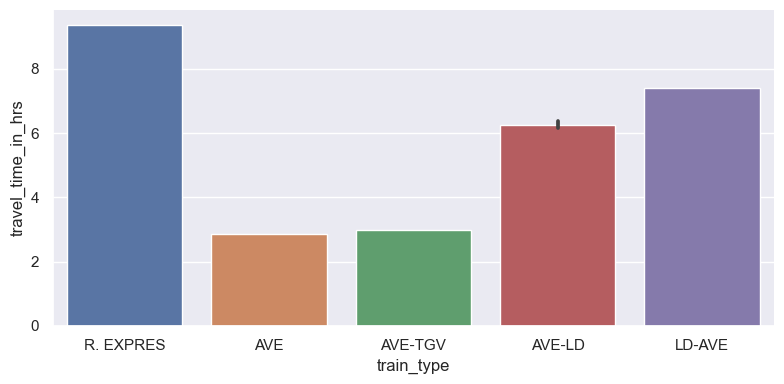

In [39]:
#write code here
df1.dropna(subset=['MadridtoBarcelona'], inplace = True)
ax= sns.catplot(kind='bar',x='train_type', y='travel_time_in_hrs', data=df1, height=4, aspect=2);

#### **Task 26: Show train_type vs price through boxplot**

<AxesSubplot:xlabel='train_type', ylabel='price'>

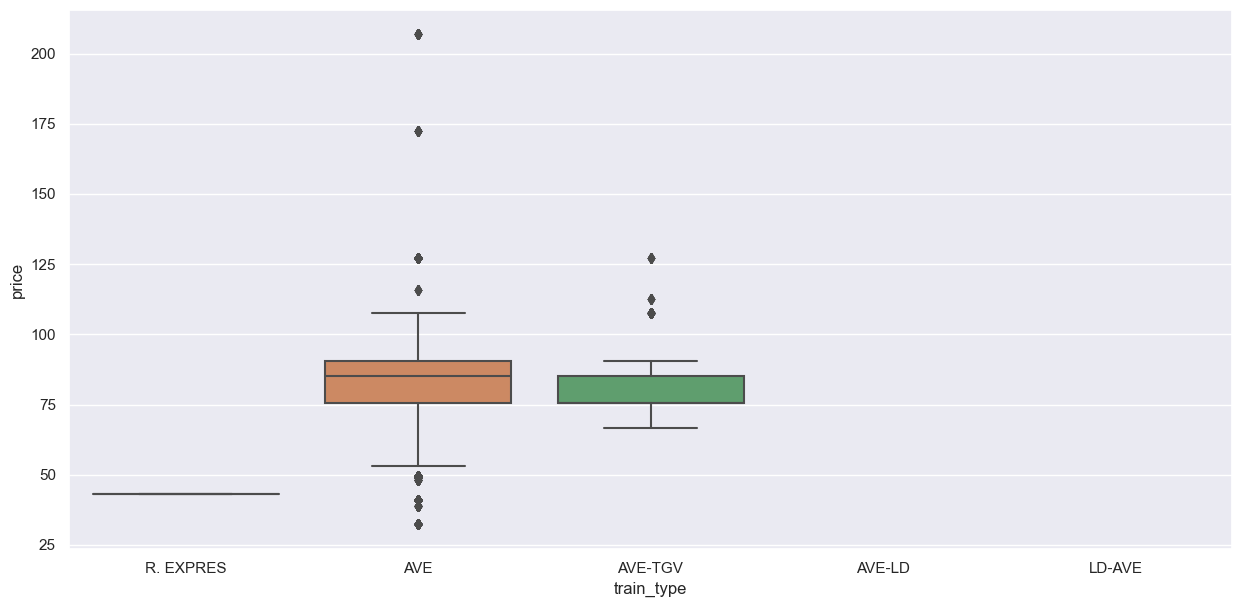

In [40]:
#write code here
plt.subplots(figsize=(15,7))
sns.boxplot(x='train_type', y='price', data=df1)

## **Travelling from MADRID to VALENCIA**

#### Task 27: Findout people travelling from MADRID to VALENCIA

In [41]:
#write code here
df1 = None
df1 = df.copy()
df1['MadridtoValencia'] = None
df1.loc[(df1['origin'] == 'MADRID') & (df1['destination'] == 'VALENCIA'), 'MadridtoValencia'] = 1
print('people travelling from MADRID to VALENCIA are : ', df1['MadridtoValencia'].sum())

people travelling from MADRID to VALENCIA are :  39447


#### Task 28: Make a plot for finding out travelling hours for each train type

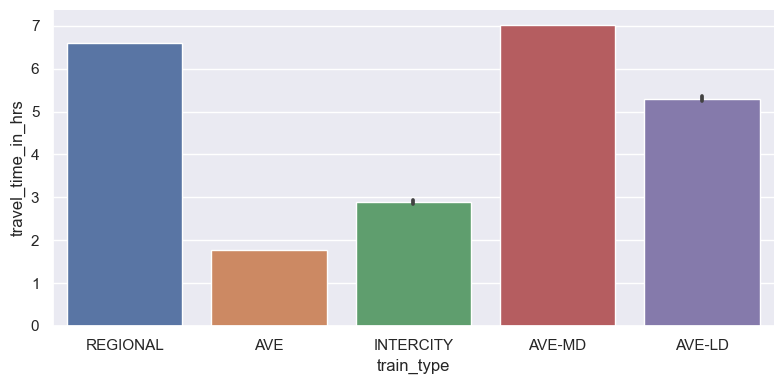

In [42]:
#write code here
df1.dropna(subset=['MadridtoValencia'], inplace = True)
ax= sns.catplot(kind='bar',x='train_type', y='travel_time_in_hrs', data=df1, height=4, aspect=2)

#### **Task 29: Show train_type vs price through boxplot**

<AxesSubplot:xlabel='train_type', ylabel='price'>

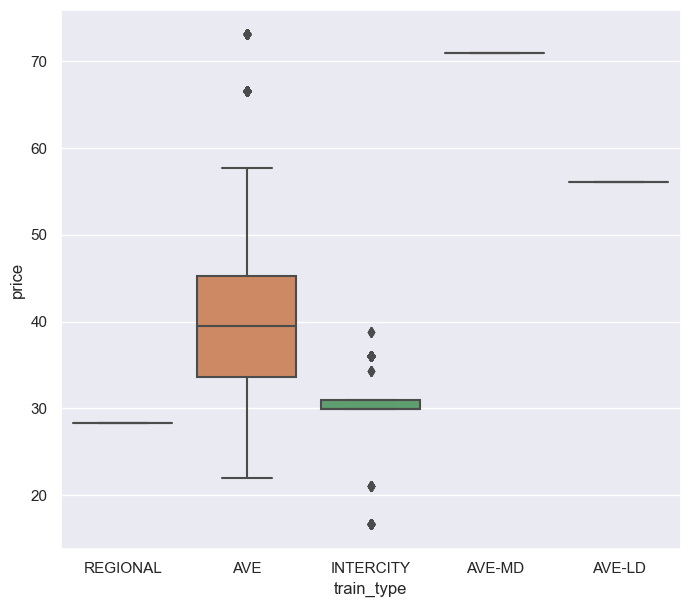

In [43]:
#write code here
fig, ax = plt.subplots(figsize=(8,7))
sns.boxplot(x='train_type', y='price', data=df1)

## **Travelling from MADRID to PONFERRADA**

#### Task 30: Findout people travelling from MADRID to PONFERRADA

In [44]:
#write code here
df1 = None
df1 = df.copy()
df1['MadridtoPonferrada'] = None
df1.loc[(df1['origin'] == 'MADRID') & (df1['destination'] == 'PONFERRADA'), 'MadridtoPonferrada'] = 1
print('people travelling from MADRID to PONFERRADA are : ', df1['MadridtoPonferrada'].sum())

people travelling from MADRID to PONFERRADA are :  2839


#### Task 31: Make a plot for finding out travelling hours for each train type

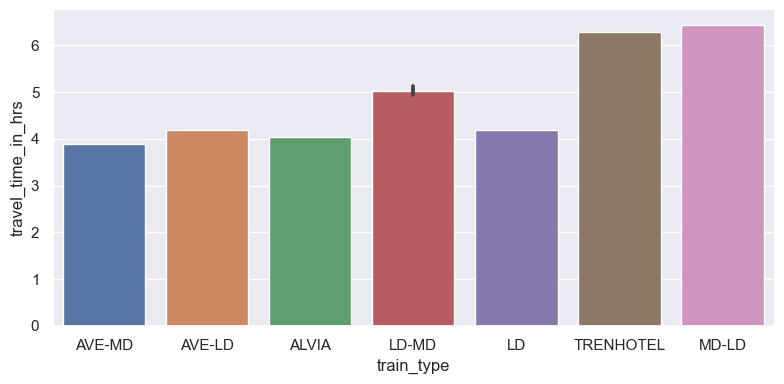

In [45]:
#write code here
df1.dropna(subset=['MadridtoPonferrada'], inplace = True)
ax= sns.catplot(kind='bar',x='train_type', y='travel_time_in_hrs', data=df1, height=4, aspect=2)

#### **Task 32: Show train_type vs price through boxplot**

<AxesSubplot:xlabel='train_type', ylabel='price'>

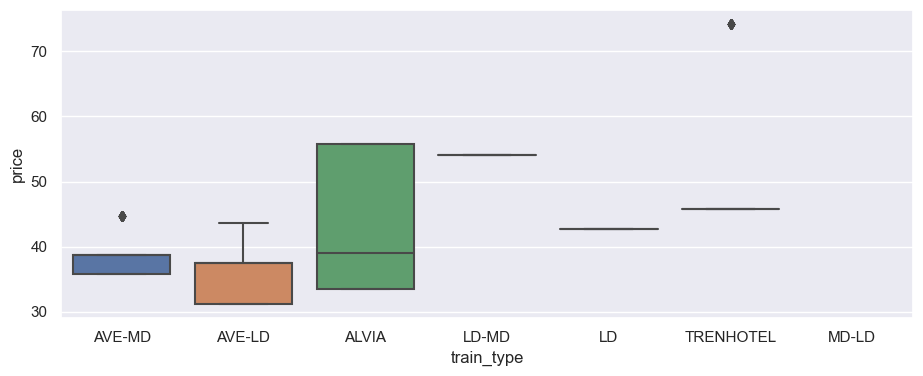

In [46]:
#write code here
plt.subplots(figsize=(11,4))
sns.boxplot(x='train_type', y='price', data=df1)

# Applying Linear  Regression

#### Task 33: Import LabelEncoder library from sklearn 

In [47]:
#write code here
!pip install sklearn
import sklearn.preprocessing 
import sklearn.preprocessing 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lab_en = preprocessing.LabelEncoder

**Data Encoding**

In [48]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [49]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333


#### Task 34: Separate the dependant and independant variables

In [50]:
#write code here
X = df.iloc[:,[1,2,3,5,6,7]].values
Y = df.iloc[:,4].values
print(X.shape)
print(Y.shape)

(215266, 6)
(215266,)


#### Task 35: Import test_train_split from sklearn

In [51]:
#write code here
from sklearn.model_selection import train_test_split

#### Task 36:**Split the data into training and test set**

In [53]:
#write code here
X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)

#### Task 37: Import LinearRegression library from sklearn

In [54]:
#write code here
from sklearn.linear_model import LinearRegression

#### Task 38: Make an object of LinearRegression( ) and train it using the training data set

In [55]:
#write code here
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [57]:
#write code here
model.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Task 39: Find out the predictions using test data set.

In [ ]:
#write code here
lr.fit(X_train, Y_train)

#### Task 40: Find out the predictions using training data set.

In [ ]:
#write code here
lr_predict_train = None

#### Task 41: Import r2_score library form sklearn

In [ ]:
#write code here
lr.fit(X_train, Y_train)

#### Task 42: Find out the R2 Score for test data and print it.

In [ ]:
#write code here
lr_r2_test= None

#### Task 43: Find out the R2 Score for training data and print it.

In [ ]:
lr_r2_train = None

Comaparing training and testing R2 scores

In [ ]:
print('R2 score for Linear Regression Testing Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

# Applying Polynomial Regression

#### Task 44: Import PolynomialFeatures from sklearn

In [ ]:
#write code here


#### Task 45: Make and object of default Polynomial Features

In [ ]:
#write code here
poly_reg = None

#### Task 46: Transform the features to higher degree features.

In [ ]:
#write code here
X_train_poly,X_test_poly = None

#### Task 47: Fit the transformed features to Linear Regression

In [ ]:
#write code here
poly_model = None

#### Task 48: Find the predictions on the data set

In [ ]:
#write code here
y_train_predicted,y_test_predict = None

#### Task 49: Evaluate R2 score for training data set

In [ ]:
#evaluating the model on training dataset
#write code here
r2_train = None

#### Task 50: Evaluate R2 score for test data set

In [ ]:
# evaluating the model on test dataset
#write code here
r2_test = None

Comaparing training and testing R2 scores

In [ ]:
#write code here
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

#### Task 51: Select the best model

**Question: Which model gives the best result for price prediction? Find out the complexity using R2 score and give your answer.**<br>
*Hint: Use for loop for finding the best degree and model complexity for polynomial regression model*

In [ ]:
#write code here
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = None
    
    X_tr_poly,X_tst_poly = None
    poly = None
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = None
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

#### Plotting the model

In [ ]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Answer**